Veri setini yükleme

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

# Dosya yolu
file_path = r"C:\Users\Kerem Yalçınkaya\Desktop\YAP470_PROJE\Churn Modeling.csv"

# CSV dosyasını yükleyin
df = pd.read_csv(file_path)

Veri Setine Genel Bakış

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


Eksik Veri Kontrolü

In [31]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


RowNumber ve CustomerId Anlamsız Olduğu İçin Veri Setinden Çıkartılır

In [32]:
df = df.drop(columns=["RowNumber", "CustomerId","Surname"], axis=1)

Kategorik Columslar İnceleme

In [33]:
categorical_columns = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"]
for column in categorical_columns:
    print(df[column].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
Exited
0    7963
1    2037
Name: count, dtype: int64


Sayisal Sütunların İstatislik Tablolarını Çıkarma

In [34]:
print(df.describe())

        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769 

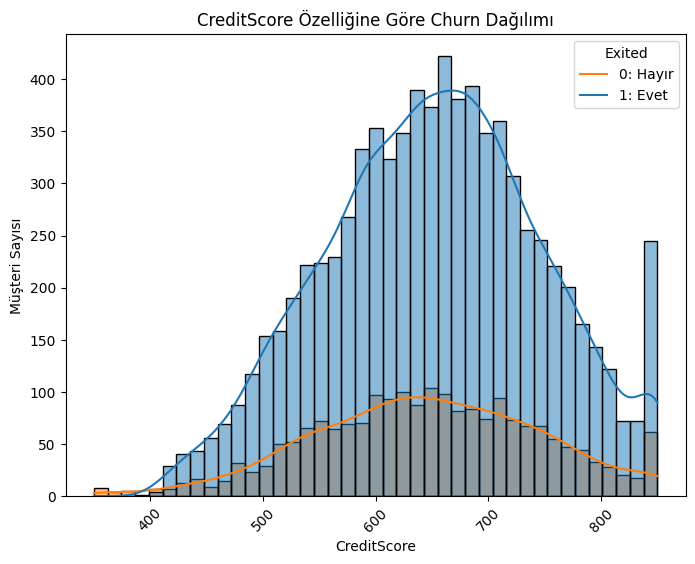

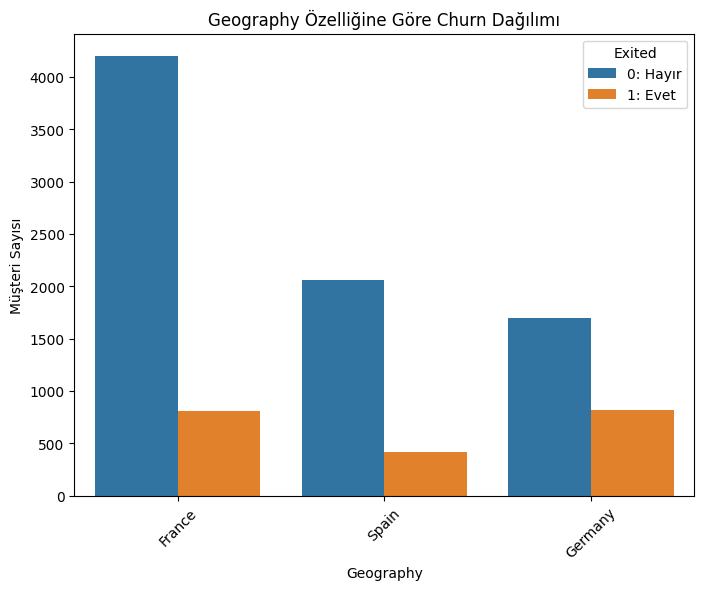

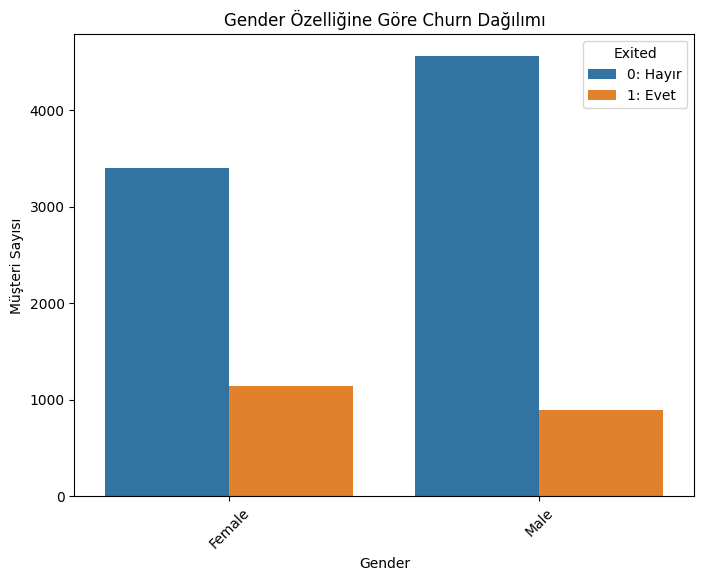

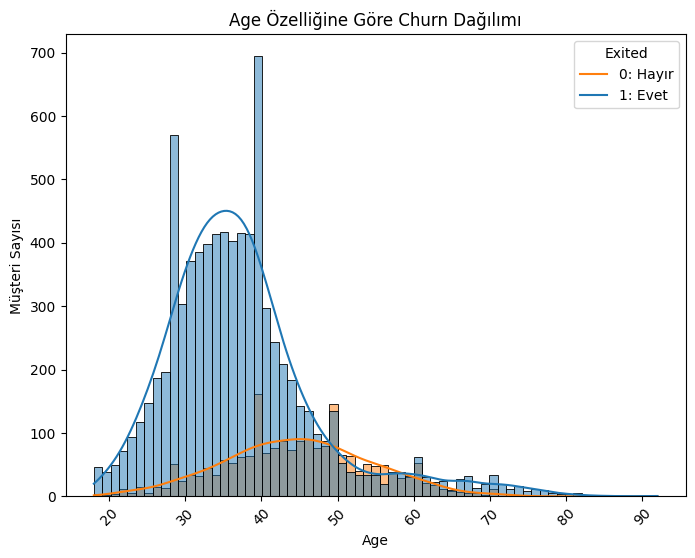

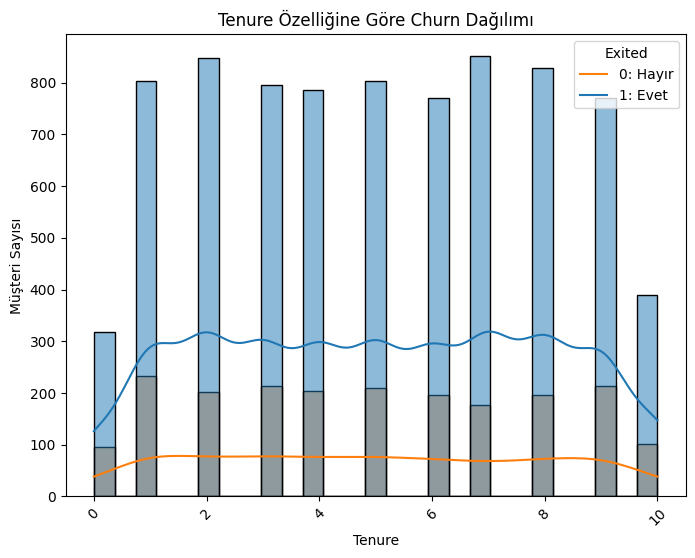

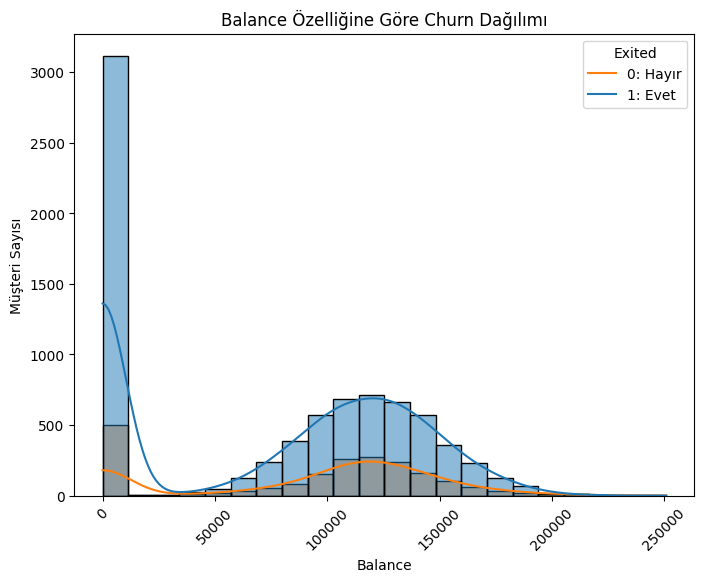

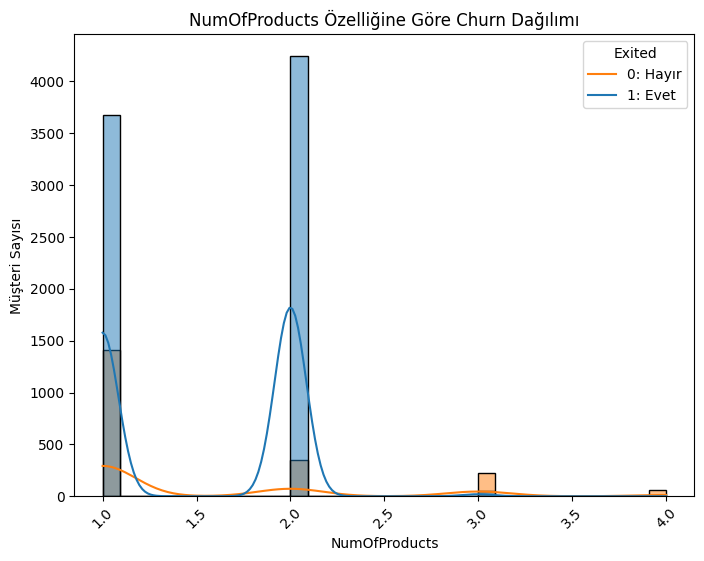

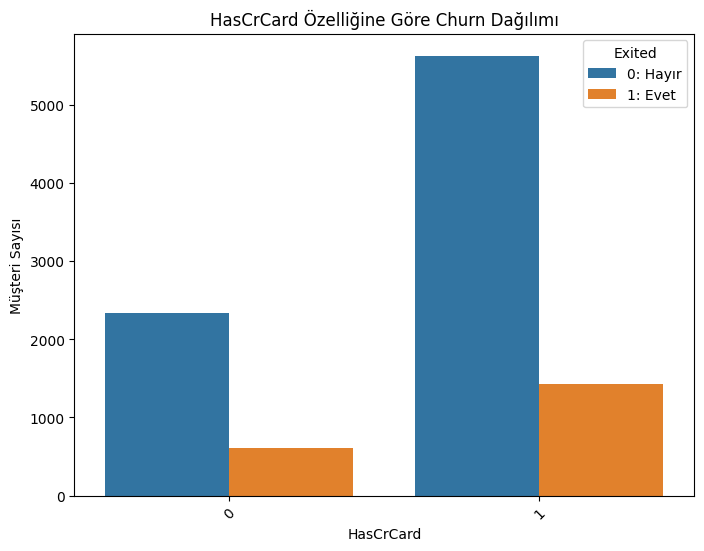

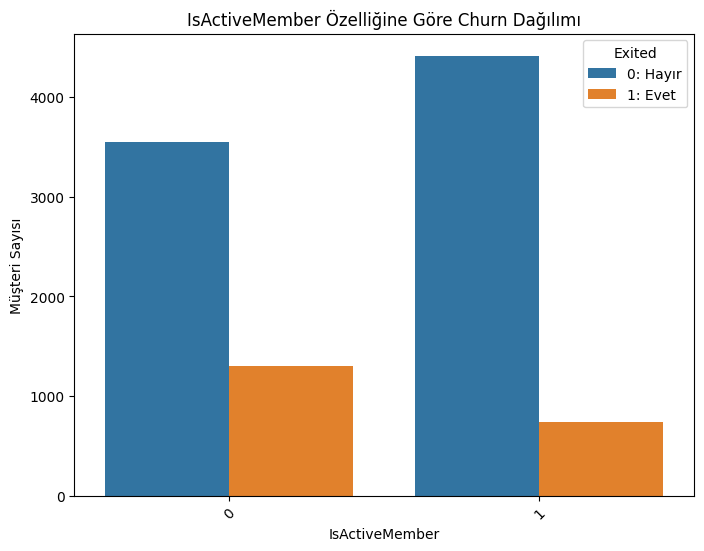

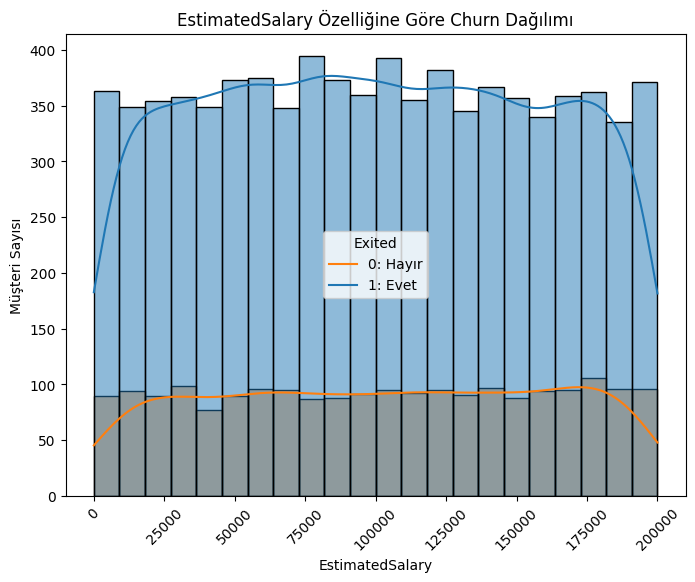

In [43]:

# 'Exited' sütunu hariç diğer sütunlar için görselleştirme
columns_to_visualize = ["CreditScore", "Geography", "Gender", "Age", "Tenure",
                        "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

for column in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    if df[column].dtype == "object" or column == "HasCrCard" or column == "IsActiveMember":
        sns.countplot(data=df, x=column, hue="Exited")
    else:
        sns.histplot(data=df, x=column, hue="Exited", kde=True)
    plt.title(f"{column} Özelliğine Göre Churn Dağılımı")
    plt.xlabel(column)
    plt.ylabel("Müşteri Sayısı")
    plt.legend(title="Exited", labels=["0: Hayır", "1: Evet"])
    plt.xticks(rotation=45)
    plt.show()


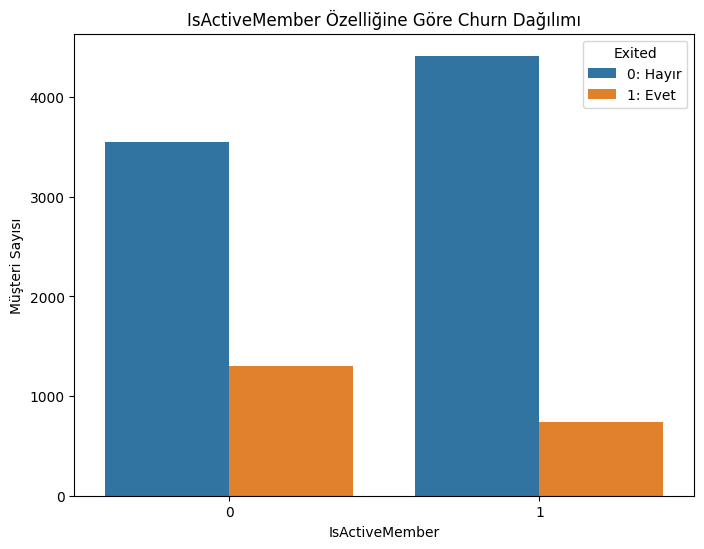

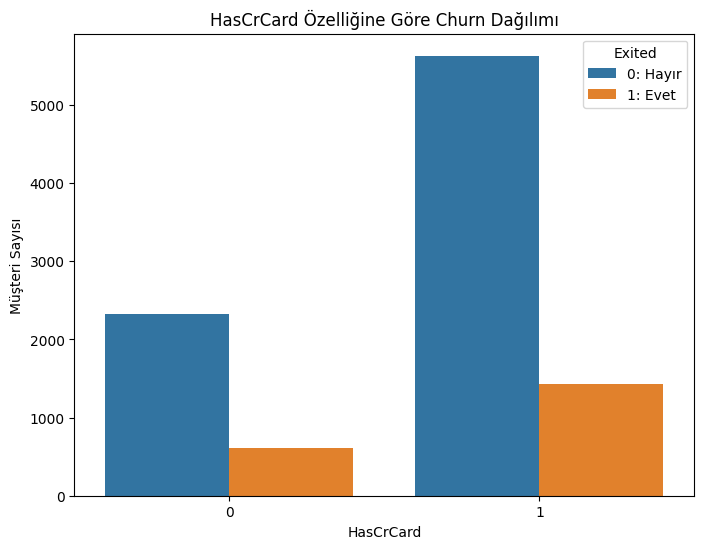